In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('ab_data.csv')

# Display the first few rows
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# Data Cleaning

In [4]:
# Check for mismatched group and landing_page combinations
mismatch = pd.concat([
    df.query('group == "treatment" and landing_page != "new_page"'),
    df.query('group == "control" and landing_page != "old_page"')
])

# Remove mismatched rows
df_clean = df.drop(mismatch.index)

# Remove duplicate user_ids
df_clean = df_clean.drop_duplicates(subset='user_id')


# Calculate Conversion Rates

In [5]:
# Calculate the number of conversions and total users in each group
conversion_counts = df_clean.groupby('group')['converted'].agg(['sum', 'count'])
conversion_counts['conversion_rate'] = conversion_counts['sum'] / conversion_counts['count']
print(conversion_counts)

             sum   count  conversion_rate
group                                    
control    17489  145274         0.120386
treatment  17264  145310         0.118808


#  Perform A/B Testing (Two-Proportion Z-Test)

In [11]:
# Number of conversions in each group
conversions = conversion_counts['sum'].values

# Number of users in each group
nobs = conversion_counts['count'].values

In [10]:
# Perform two-proportion z-test
conversions = conversion_counts['sum'].values
nobs = conversion_counts['count'].values

z_stat, p_val = proportions_ztest(conversions, nobs)
print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_val:.4f}')

alpha = 0.05
if p_val < alpha:
    print("✅ Significant: Reject the null hypothesis.")
else:
    print("❌ Not Significant: Fail to reject the null hypothesis.")

Z-Statistic: 1.3109
P-Value: 0.1899
❌ Not Significant: Fail to reject the null hypothesis.


# Interpret the Results

In [7]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")

Fail to reject the null hypothesis: No significant difference in conversion rates.


# Visualize the Conversion Rates

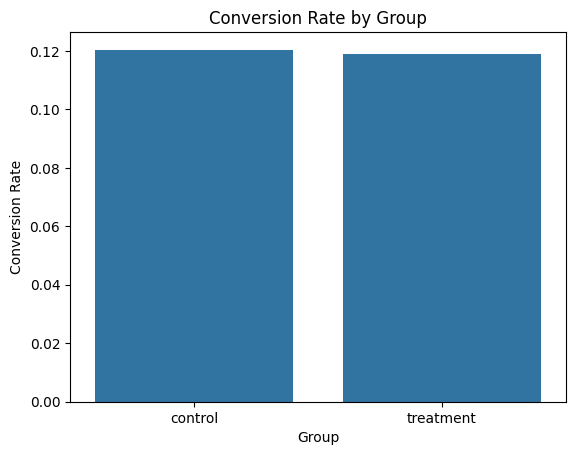

In [8]:
# Plot conversion rates
sns.barplot(x=conversion_counts.index, y=conversion_counts['conversion_rate'])
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

In [12]:
# Set Seaborn style
sns.set(style="whitegrid")

C:\Users\tonsi ten\AppData\Local\Temp\ipykernel_8044\2143740052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_counts.index, y=conversion_counts['conversion_rate'], palette='viridis')


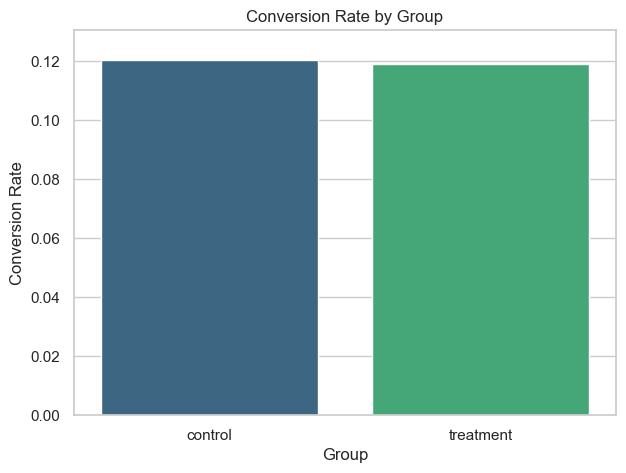

In [13]:
# 1. Bar Plot of Conversion Rates
plt.figure(figsize=(7, 5))
sns.barplot(x=conversion_counts.index, y=conversion_counts['conversion_rate'], palette='viridis')
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, max(conversion_counts['conversion_rate']) + 0.01)
plt.show()

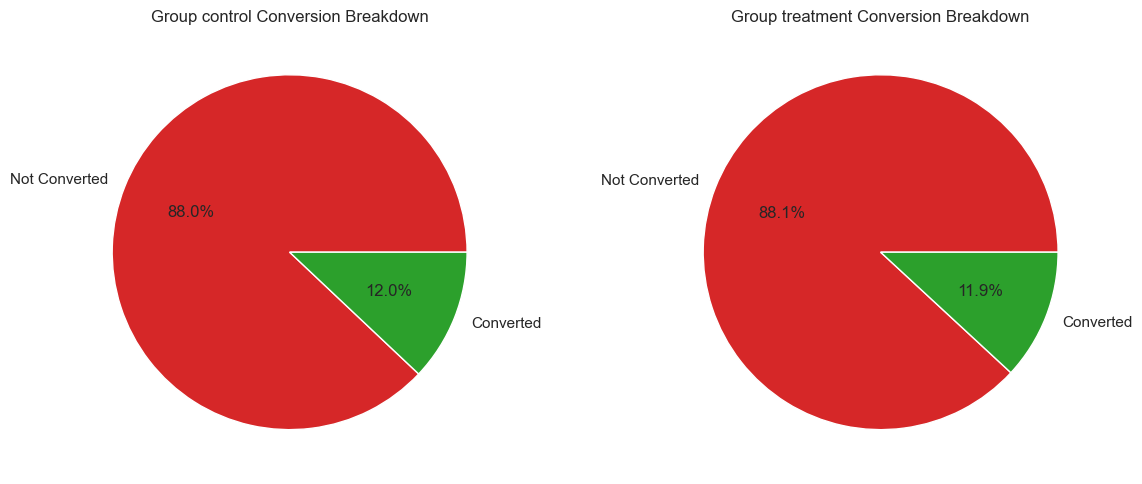

In [14]:
# 2. Pie Chart of Conversion Outcomes by Group
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
groups = df_clean['group'].unique()

for i, group in enumerate(groups):
    data = df_clean[df_clean['group'] == group]
    labels = ['Not Converted', 'Converted']
    sizes = data['converted'].value_counts().sort_index()
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#d62728', '#2ca02c'])
    axes[i].set_title(f'Group {group} Conversion Breakdown')

plt.tight_layout()
plt.show()

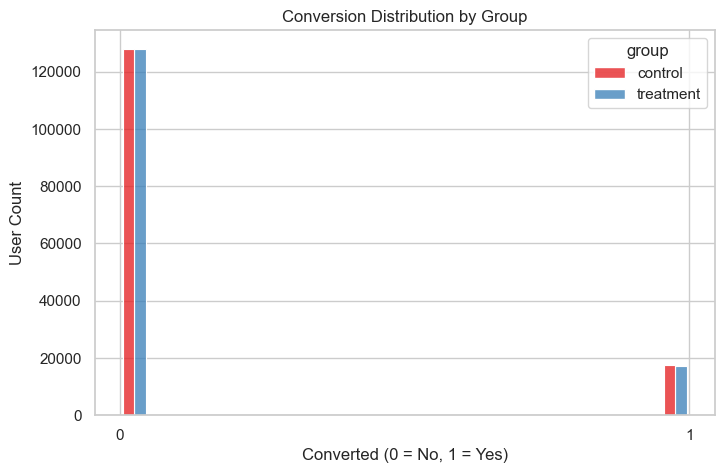

In [15]:
# 3. Histogram of Converted vs Not Converted by Group
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='converted', hue='group', multiple='dodge', shrink=0.8, palette='Set1')
plt.title('Conversion Distribution by Group')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('User Count')
plt.xticks([0, 1])
plt.show()

C:\Users\tonsi ten\AppData\Local\Temp\ipykernel_8044\779444351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='converted', data=df_clean, palette='coolwarm')


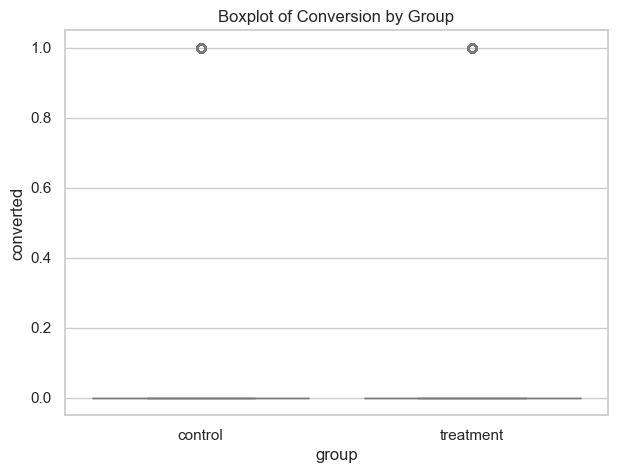

In [16]:
# 4. Box Plot to Compare Conversion Behavior
plt.figure(figsize=(7, 5))
sns.boxplot(x='group', y='converted', data=df_clean, palette='coolwarm')
plt.title('Boxplot of Conversion by Group')
plt.show()